In [1]:
import pandas as pd    # to load dataset
import numpy as np     # for mathematic equation
from nltk.corpus import stopwords   # to get collection of stopwords
from sklearn.model_selection import train_test_split       # for splitting dataset
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense # layers of the architecture
from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model   # load saved model
import re
import nltk
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
# Import label encoder
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from tensorflow.keras import preprocessing as kprocessing
import gensim.downloader as api
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter
#keras lstm model modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dropout

# stopwords module
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
#selecting the stopwords
stopword_list=nltk.corpus.stopwords.words('english')
stopwords_selected= stopword_list[100:]
# module to break the text into sentenses
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#loading the dataset
data = pd.read_csv('/content/IMDB Dataset.csv')

print(data)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [4]:
#sample positive and negative reviews
positive_df = data[data.sentiment=='positive']
positive_df.review.values[:5]

array(["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to

In [5]:
#sample positive and negative reviews
negative_df = data[data.sentiment=='negative']
negative_df.review.values[:5]

array(["Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.",
       "This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, the show was not really funny anymore, and it's continued its decli

In [6]:
#statistical view of dataset
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


There 2 sentiments in the dataset
There are 49582 unique reviews and rest are the duplicate reviews

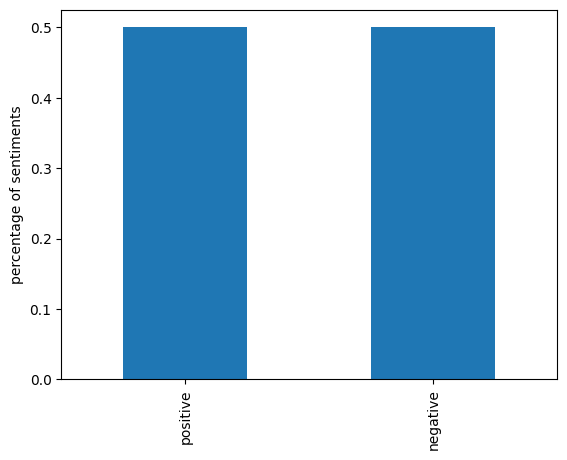

In [7]:
#classes distribution
data['sentiment'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('percentage of sentiments')
plt.show()

🎥 The sentiments positive and negative categories are balanced

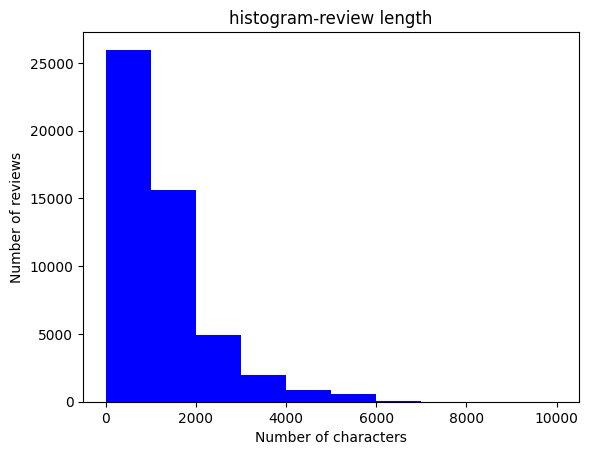

In [8]:
#histogram plot for review length characters
data['review'].str.len().hist( range=[0, 10000], facecolor='blue', align='mid',grid=False)
plt.ylabel('Number of reviews')
plt.xlabel('Number of characters')
plt.title('histogram-review length')
plt.show()

🎥 Histogram shows that the review lengths are between 0-7000 characters
and most of the words are between 0-2000 characters

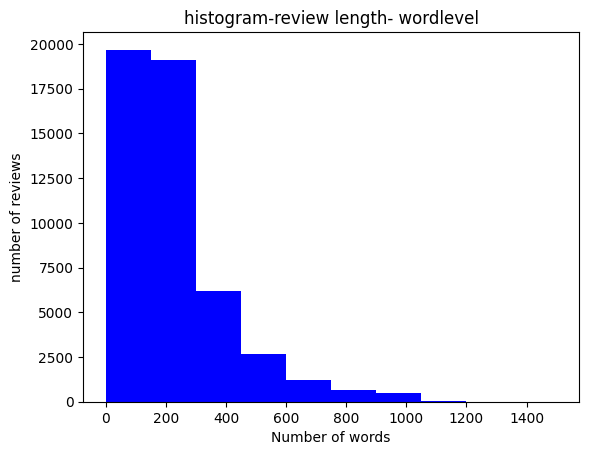

In [9]:
#histogram for words in the review
data['review'].str.split().map(lambda x:len(x)).hist(range=[0, 1500], facecolor='blue', align='mid',grid=False)
plt.title('histogram-review length- wordlevel')
plt.ylabel('number of reviews')
plt.xlabel('Number of words')
plt.show()

🎥 The histogram shows the distribution of words in the reviews
Most of the reviews are present 0-300 word

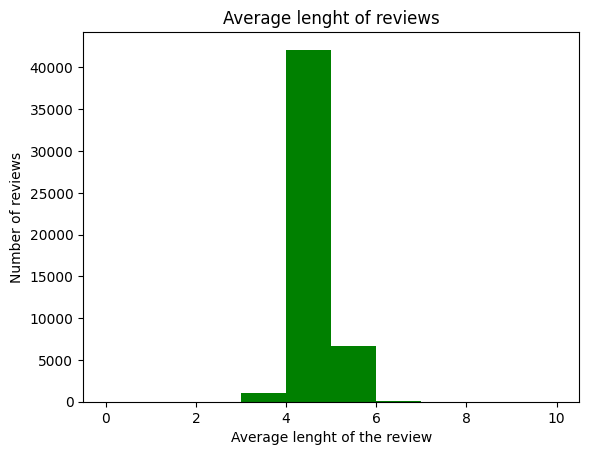

In [10]:
#histogram of average length of reviews
data['review'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist(range=[0, 10], facecolor='green',grid=False)
plt.title('Average lenght of reviews')
plt.xlabel('Average lenght of the review')
plt.ylabel('Number of reviews')
plt.show()

Data cleaning
Removing duplicates
Dropping null values
List item
List item

In [11]:
#dropping the duplicates
data.drop_duplicates(inplace=True)
#dropping the null values
data.dropna()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


After removing the duplicates and null values we have 49582 records

Text processing
converting the tex to lower cases, removing the special characters non alphabetic letters

tokenizing the text means converting the text from strings to lists of words

remove stopwords i.e. removing the common words that bring noise to the system for example like ‘a’, ‘the’, …)

stemm (remove -ing, -ly, …, like convert ‘making’ to ‘make’, so that words with same meaning are identified as being the same)

lemmatize (i.e convert the word into a root word, for example ‘feet’ becomes

‘foot’)

In [13]:
#declaring the stop words english
english_stops = set(stopwords.words('english'))
#removing html tages
def del_html(text):
  """this function takes the input of text with HTML tags and gives the text without HTML tags
  Input:text
  Output:text"""
  soup = BeautifulSoup(text,'html.parser')
  return soup.get_text()

def del_square_brackets(text):
    # """" This function removes the square brackets from the text
  # using regular expression python library
  # Input: text
  # Output: text without square brackets """
   return re.sub('\[[^]]*\]', '', text)

def del_special_characters(text,remove_digits = True):

  # """ This function removes the special characters from the text  """
  pattern = r'[^a-zA-z0-9\s]'
  re.sub(pattern,'',text)
  return text

def final_text(text):
  # """This function uses both functions remove_html and remove_square_bracket
  # and returns the clean text"""
      text =del_html(text)
      text = del_square_brackets(text)
      text = del_special_characters(text)
      return text

#Applying the all the preprocessing steps to the dataset
data['review'] = data['review'].apply(final_text)

<ipython-input-13-b1c0bcc103c7>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text,'html.parser')


Text stemming

In [18]:
def word_stemmer(text):
  # """ A word stemmer based on the Porter stemming algorithm """
    ps = SnowballStemmer('english')
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply stemming function to the review column
data['review']=data['review'].apply(word_stemmer)
def text_lower(text):
  "returns the text in lower case"
  return text.lower()

#applying lower case function to reviews
data['review'] = data['review'].apply(text_lower)
def remove_stopwords(text):
  # """ This function removes the stopwords in the text"""
    tokenizer=ToktokTokenizer()
    stopword_list=stopwords_selected #Setting English stopwords
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

#Apply function on review column
data['review']=data['review'].apply(remove_stopwords)
#Label encoding the sentiments
label_encoder = LabelEncoder()

data['sentiment']= label_encoder.fit_transform(data['sentiment'])

label_encoder.inverse_transform([1,0])

array([1, 0])

Data splitting

In [19]:
X = data['review'] #features
y = data['sentiment']
# Split into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=data['sentiment'])
print('length of training samples',len(X_train))
print('lenght of testing samples',len(X_test))

length of training samples 34707
lenght of testing samples 14875


In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
#to make all the sentences of same length padding the sequences
def get_max_length():

    review_length = []
    for review in X_train:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))
# ENCODE REVIEW
token = Tokenizer()
token.fit_on_texts(X_train)
X_train = token.texts_to_sequences(X_train)
X_test = token.texts_to_sequences(X_test)

max_length = get_max_length()

X_train = pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1   # add 1 because of 0 padding

print('Encoded X Train\n', X_train, '\n')
print('Encoded X Test\n', X_test, '\n')
print('Maximum review length: ', max_length)

Encoded X Train
 [[   9   99    8 ...    0    0    0]
 [5788 2416    6 ...   51   33   40]
 [ 149  848    9 ...  132    4 1009]
 ...
 [  52   19   15 ...  110    8    1]
 [  10    6   27 ...    0    0    0]
 [   9   13  932 ...    0    0    0]] 

Encoded X Test
 [[    9   377     9 ...     5   175    13]
 [   92  1564   196 ...   232  1352    24]
 [ 1092 18053    32 ...    96    85  1048]
 ...
 [ 2420  8120     6 ...     0     0     0]
 [   88    29    23 ...     0     0     0]
 [ 3460   501   187 ...     1  3460    23]] 

Maximum review length:  223


**LSTM IMPLEMENTATION**

In [21]:
# ARCHITECTURE
EMBED_DIM = 32
LSTM_OUT = 64

model = Sequential()
model.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model.add(Dropout(0.2))
model.add(LSTM(LSTM_OUT))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 223, 32)           2500960   
                                                                 
 dropout (Dropout)           (None, 223, 32)           0         
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 2525857 (9.64 MB)
Trainable params: 2525857 (9.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [22]:
checkpoint = ModelCheckpoint(
    'LSTM.h5',
    save_best_only=True,
    verbose=1
)
history = model.fit(X_train, y_train, epochs=15,batch_size=32,
                    validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/15
1085/1085 [==============================] - ETA: 0s - loss: 0.6869 - accuracy: 0.5359
Epoch 1: val_loss improved from inf to 0.68747, saving model to LSTM.h5
1085/1085 [==============================] - 201s 181ms/step - loss: 0.6869 - accuracy: 0.5359 - val_loss: 0.6875 - val_accuracy: 0.5308
Epoch 2/15


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1085/1085 [==============================] - ETA: 0s - loss: 0.6303 - accuracy: 0.6478
Epoch 2: val_loss improved from 0.68747 to 0.62840, saving model to LSTM.h5
1085/1085 [==============================] - 186s 172ms/step - loss: 0.6303 - accuracy: 0.6478 - val_loss: 0.6284 - val_accuracy: 0.6728
Epoch 3/15
1085/1085 [==============================] - ETA: 0s - loss: 0.6261 - accuracy: 0.6694
Epoch 3: val_loss did not improve from 0.62840
1085/1085 [==============================] - 192s 177ms/step - loss: 0.6261 - accuracy: 0.6694 - val_loss: 0.6499 - val_accuracy: 0.6325
Epoch 4/15
1085/1085 [==============================] - ETA: 0s - loss: 0.6334 - accuracy: 0.6461
Epoch 4: val_loss did not improve from 0.62840
1085/1085 [==============================] - 190s 175ms/step - loss: 0.6334 - accuracy: 0.6461 - val_loss: 0.6891 - val_accuracy: 0.5261
Epoch 5/15
1085/1085 [==============================] - ETA: 0s - loss: 0.5772 - accuracy: 0.6914
Epoch 5: val_loss improved from 0.6284

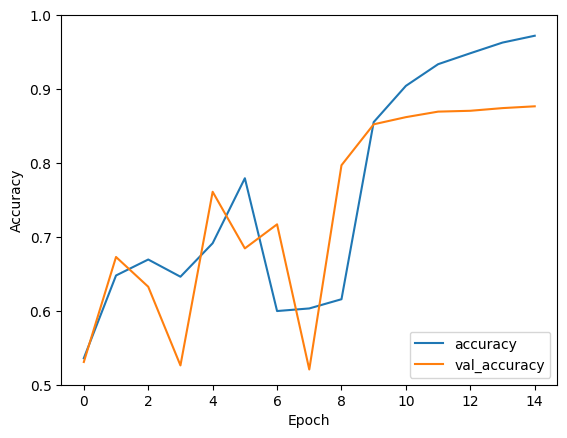

465/465 - 16s - loss: 0.3906 - accuracy: 0.8766 - 16s/epoch - 35ms/step


In [23]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(X_test,
                                     y_test,
                                     verbose=2)

Model testing

In [24]:
import tensorflow
saved_model=tensorflow.keras.models.load_model('/content/LSTM.h5')
# predictions = saved_model.predict(X_test)
predictions = model.predict(X_test)
predictions=np.argmax(predictions,axis=1)

465/465 [==============================] - 18s 38ms/step


In [25]:
print(classification_report(y_test, predictions,labels=np.unique(y_test)))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      7410
           1       0.00      0.00      0.00      7465

    accuracy                           0.50     14875
   macro avg       0.25      0.50      0.33     14875
weighted avg       0.25      0.50      0.33     14875



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


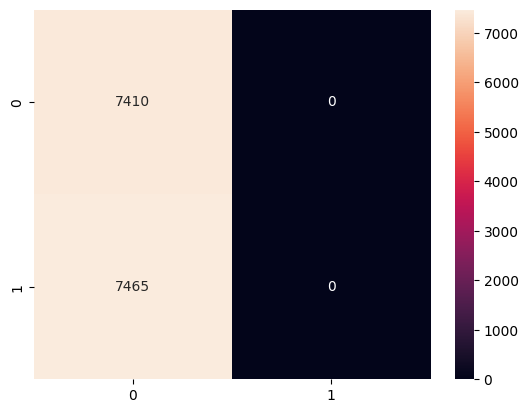

In [26]:
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True,fmt='g')
plt.show()

Loading the saved model

In [30]:
saved_model = load_model('/content/LSTM.h5')

review = str(input('Movie Review: '))

Movie Review: this is good


In [31]:
# Pre-process input
regex = re.compile(r'[^a-zA-Z\s]')
review = regex.sub('', review)
print('Cleaned: ', review)

words = review.split(' ')
filtered = [w for w in words if w not in english_stops]
filtered = ' '.join(filtered)
filtered = [filtered.lower()]

print('Filtered: ', filtered)

Cleaned:  this is good
Filtered:  ['good']


In [32]:
tokenize_words = token.texts_to_sequences(filtered)
tokenize_words = pad_sequences(tokenize_words, maxlen=max_length, padding='post', truncating='post')
print(tokenize_words)

[[43  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]]


In [33]:
result = saved_model.predict(tokenize_words)
print(result)

1/1 [==============================] - 0s 422ms/step
[[0.9100511]]


In [34]:
if result >= 0.6:
    print('positive')
else:
    print('negative')

positive
